In [3]:
import random
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
import os

from scipy.stats import norm, skewnorm

In [2]:
def rms(x, axis=None):
    if axis is not None:
        return np.sqrt(np.sum(x**2, axis=axis) / x.shape[axis])
    return np.sqrt(np.sum(x**2) / x.size)
normal_pdf = lambda mu, sigma, x: np.exp(-(x - mu)**2 / (2 * sigma**2))/(np.sqrt(2 * np.pi * sigma**2))

In [38]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [5]:

zones = ['ISONE CA', 'ME', 'RI', 'VT', 'CT', 'NH', 'SEMASS', 'WCMASS', 'NEMASSBOST']

test_z_scores_dict = dict()
test_z_scores = []

z_scores_dict = dict()
z_scores = []

relative_perfs = pd.DataFrame()
relative = []

folder = ".\\experiments\\vanilla_comp\\"
for fname in os.listdir(folder):
    if fname.endswith("relative_perfs.npy"):
        month = fname[12:15]
        relative_perfs[month] = np.load(os.path.join(folder, fname))
        relative.extend(relative_perfs[month])
    if fname.endswith("test_z_scores.npy"):
        month = fname[12:15]
        test_z_scores_dict[month] = np.load(os.path.join(folder, fname))
        test_z_scores.extend((test_z_scores_dict[month][:, :, 0][0]).tolist())
    elif fname.endswith("z_scores.npy"):
        month = fname[12:15]
        z_scores_dict[month] = np.load(os.path.join(folder, fname))
        z_scores.extend((z_scores_dict[month][:, :, 0][0]).tolist())
relative_perfs.index = ['ISONE CA', 'ME', 'RI', 'VT', 'CT', 'NH', 'SEMASS', 'WCMASS', 'NEMASSBOST']
relative_perfs = relative_perfs.T
relative_perfs = relative_perfs.loc[months]

In [6]:
relative_perfs["avg"] = relative_perfs.mean(axis=1)
relative_perfs

,ISONE CA,ME,RI,VT,CT,NH,SEMASS,WCMASS,NEMASSBOST,avg
Jan,13.592506,7.236752,-6.215116,7.746979,3.906798,21.472776,11.770540,9.247547,6.775420,8.392689
Feb,-7.188434,-9.939449,6.296061,4.654600,7.691406,-7.350878,3.687269,-2.339584,4.136036,-0.039219
Mar,23.833443,25.278269,26.111572,28.561030,23.632270,27.080959,27.842376,16.704992,14.251738,23.699628
Apr,20.477089,-18.979579,23.618312,32.365015,33.813207,27.663434,35.118771,32.875166,27.338120,23.809948
May,5.424575,1.642643,-6.786470,21.734621,-3.482819,8.421488,2.127361,-0.110955,-12.081322,1.876569
Jun,13.665448,16.210534,20.875809,5.031805,21.380714,17.575073,10.780926,9.669403,2.083607,13.030369
Jul,26.277853,23.731817,19.811630,9.921223,30.552949,29.724549,19.395234,14.566929,12.041061,20.669249
Aug,16.919618,22.449793,18.305715,10.086784,22.072362,27.786850,18.239768,-3.215009,-1.637649,14.556470
Sep,-5.316200,2.166968,5.102784,3.977093,-2.104084,0.033106,0.345824,-2.654832,0.625954,0.241846
Oct,-0.188981,12.121388,0.783305,13.842552,1.054683,9.400052,7.062053,3.816700,5.516739,5.934277


In [7]:
np.std(relative)

11.577186427182768

In [8]:
# 95\% confidence interval (not accurate, these samples are not independent). We assume that the 6 months we tested on (every other month) are representative
# of our overall performance on the 6 rounds of GEFCom2017. (maybe explain more why this is as fair of a comparison as it gets)
me = np.mean(relative), 
er = np.std(relative_perfs.avg, ddof=1) / np.sqrt(12)  # ?
print(me, 2 * er)
me - 2 * er, me + 2 * er

(11.294098729931662,) 5.248581219648191


(array([6.04551751]), array([16.54267995]))

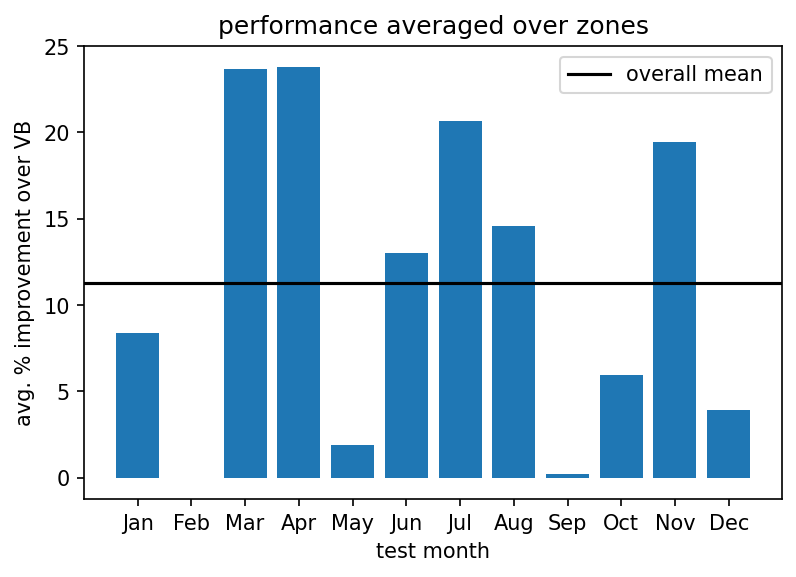

In [10]:
plt.figure(dpi=150)
plt.bar(np.arange(12), relative_perfs.avg, tick_label=relative_perfs.index)
plt.axhline(me, color="k", label="overall mean")
plt.title("performance averaged over zones")
plt.ylabel("avg. % improvement over VB")
plt.xlabel("test month")
plt.legend()

(-0.30935511487652756, 1.2199308014257895)

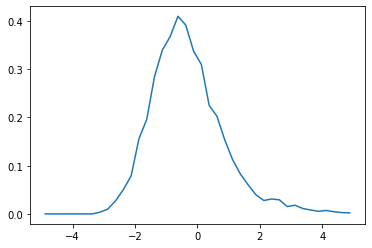

In [11]:
z_hist, bin_edges = np.histogram(test_z_scores, bins=40, range=(-5, 5), density=True)
z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.plot(z_axis, z_hist, label="Koopman test z-scores")
# plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
# plt.title(list(all_data.keys())[i])
np.mean(test_z_scores), np.mean(rms(np.array(test_z_scores)))

In [12]:
mar_z = np.array(test_z_scores_dict["Mar"])
mar_z.std(axis=1)

array([[1.21308564],
       [0.91726423],
       [1.1737755 ],
       [1.45926772],
       [1.20578041],
       [1.20769826],
       [1.19970282],
       [1.27310501],
       [1.28774317]])

(-0.02707384298888987, 0.9737972309432206)

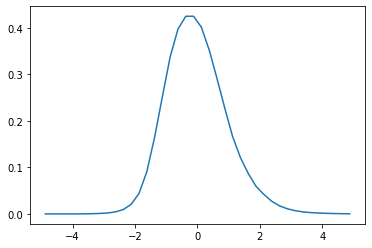

In [13]:
z_hist, bin_edges = np.histogram(z_scores, bins=40, range=(-5, 5), density=True)
z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.plot(z_axis, z_hist, label="Koopman train z-scores")
# plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
# plt.title(list(all_data.keys())[i])
np.mean(z_scores), rms(z_scores)

In [14]:
list(np.mean(test_z_scores_dict[mo]) for mo in relative_perfs.index)

[-0.5742616549665047,
 -0.8931502503227425,
 0.15497558559142474,
 -0.3802324627280704,
 -0.2902479867490024,
 -0.11282195854511021,
 -0.48067210306814695,
 -0.610997502938538,
 -0.05055767952011566,
 -0.3121570583114605,
 -0.16144202399979662,
 0.5644286115598942]

# periodic trends in uncertainty

In [41]:
import json
month_name = "Dec"
zone_name = "VT"

with open("GEFCom2017\\GEFCom2017-Qual\\GEFCom2017QualAll.json") as f:
    all_data = json.loads(f.read())
    
data = np.transpose(np.array([all_data[zone_name]["DEMAND"]], dtype=np.float64))
dates = np.array(list(map(pd.Timestamp, all_data["ISONE CA"]["Date"])))
zones = list(all_data.keys())
print(zones)

month_idx = months.index(month_name)
print("Testing on month", months[month_idx])
test_start_date = pd.Timestamp(f"2017-{month_idx + 1}-01 00:00:00")
test_start = np.argwhere(dates == test_start_date)[0, 0]
test_length = 31 * 24

delay_delta = pd.Timedelta(days=52)
delay = delay_delta.days * 24
train_end_date = test_start_date - delay_delta
train_start_date = train_end_date.replace(year=train_end_date.year - 11)
train_start = np.argwhere(dates == train_start_date)[0, 0]
train_length_delta = train_end_date - train_start_date
train_through = train_length_delta.days * 24
pre_length_delta = train_length_delta * 0.5 # the length of time at the beginning of the trianing period to hide from mu
pre_length = pre_length_delta.days * 24

print("MONTH:", month_name)
data = np.array([all_data[zone_name]["DEMAND"]], dtype=np.float64).T

# rescale data
x_original = data
mean = np.mean(data, axis=0)
rnge = np.max(data, axis=0) - np.min(data, axis=0)
data = (data - np.matlib.repmat(mean, data.shape[0], 1)) / np.matlib.repmat(rnge, data.shape[0], 1)
print("data", data.shape)
predict_through = train_through + delay + test_length
x = data[train_start:][:predict_through]

['ISONE CA', 'ME', 'RI', 'VT', 'CT', 'NH', 'SEMASS', 'WCMASS', 'NEMASSBOST']
Testing on month Dec
MONTH: Dec
data (113952, 1)


In [120]:
folder = ".\\experiments\\periodic_uncertainty\\"
for fname in os.listdir(folder):
    if fname.endswith("test_z_scores.npy"):
        print(fname)
        unc_test_z_scores = np.load(os.path.join(folder, fname))
    elif fname.endswith("z_scores.npy"):
        print(fname)
        unc_z_scores = np.load(os.path.join(folder, fname))
    elif fname.endswith("mu.npy"):
        print(fname)
        mu_hat = np.load(os.path.join(folder, fname))
    elif fname.endswith("sigma.npy"):
        print(fname)
        sigma_hat = np.load(os.path.join(folder, fname))
    elif fname.endswith("alpha.npy"):
        print(fname)
        alpha_hat = np.load(os.path.join(folder, fname))

control_DecVT_train_start=15528_2021-04-13_00.24.59.735103trained15528-96432_alpha.npy
control_DecVT_train_start=15528_2021-04-13_00.24.59.735103trained15528-96432_mu.npy
control_DecVT_train_start=15528_2021-04-13_00.24.59.735103trained15528-96432_sigma.npy
control_DecVT_train_start=15528_2021-04-13_04.12.20.853126test_z_scores.npy
control_DecVT_train_start=15528_2021-04-13_04.12.20.853126z_scores.npy


In [121]:
start = 0
idx = train_through
import time
now = time.time()
quantiles = skewnorm.cdf(x[start:idx], alpha_hat[start:idx], loc=mu_hat[start:idx], scale=sigma_hat[start:idx])
deskewed_z_scores = norm.ppf(quantiles)
print(time.time() - now)

41.95288681983948


In [122]:
z_hist, bin_edges = np.histogram(deskewed_z_scores, bins=40, range=(-5, 5), density=True)
z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.plot(z_axis, z_hist, label="Koopman train z-scores")
plt.plot(z_axis, norm.pdf(z_axis), label="Standard Normal Curve")
np.mean(deskewed_z_scores), rms(deskewed_z_scores)

(inf, inf)

In [123]:
a = np.mean(alpha_hat)
m = -0.634
s = 1.184
skewnorm.mean(a, loc=m, scale=s), skewnorm.std(a, loc=m, scale=s)

(-0.00034606552124027967, 1.0001693245623013)

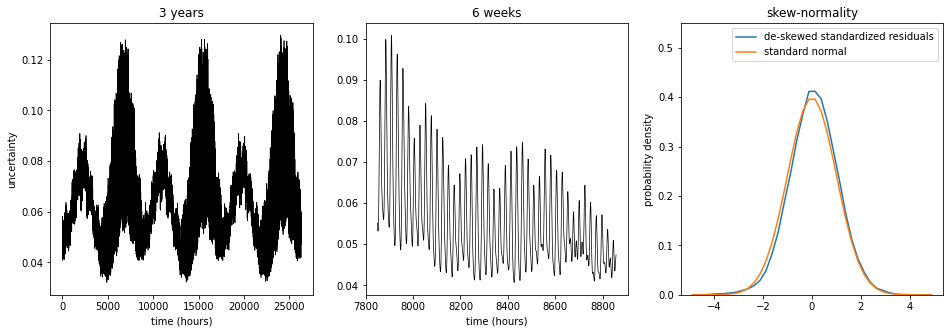

In [147]:
%matplotlib inline
std_hat = skewnorm.std(alpha_hat, loc=mu_hat, scale=sigma_hat)
plt.subplots(figsize=(16, 5))
plt.subplot(131)
plt.title("3 years")
plt.plot(std_hat[:8760 * 3], linewidth=0.7, color="k")
plt.ylabel("uncertainty")
plt.xlabel("time (hours)")
plt.subplot(132)
plt.title("6 weeks")
st = 7850
plt.plot(np.arange(st, st + 6 * 168), std_hat[st:st + 6 * 168], linewidth=0.7, color="k")
plt.xlabel("time (hours)")
plt.subplot(133)
plt.plot(z_axis, z_hist, label="de-skewed standardized residuals")
plt.plot(z_axis, norm.pdf(z_axis), label="standard normal")
plt.title("skew-normality")
plt.ylabel("probability density")
plt.ylim([0, 0.55])
plt.legend()

In [26]:
from scipy.stats import skewnorm
import datetime

In [54]:
now = time.time()
q = []
for i in range(100):
    q.append(skewnorm.ppf(0.5, 1, loc=0, scale=1))
print(time.time() - now)

1.3105669021606445


In [57]:
now = time.time()
q_approx = []
for i in range(100):
    samples = skewnorm.rvs(1, loc=0, scale=1, size=1_000_000)
    samples.sort()
    q_approx.append(samples[len(samples) // 2])
print(time.time() - now)

37.38897919654846


In [56]:
abs(np.array(q) - np.array(q_approx)).mean()

1.6187922268725379

In [191]:
qs = []
for trial in range(100):
    now = time.time()
    all_samples = []
    for i in range(20):  # integrate over 50 temperature scenarios
        # temp_scenario = # random sample from Koopman temperature forecast
        # plug temperature scenario into Koopman, get a 1 month demand forecast
        mu_hat, sigma_hat, alpha_hat = np.random.uniform(-1, 1, 744), np.random.uniform(0, 2, 744), np.random.uniform(-1, 1, 744)
        for hr in range(744):  # 744 hours in a month
            samples = skewnorm.rvs(alpha_hat[hr], loc=mu_hat[hr], scale=sigma_hat[hr], size=1000)
            all_samples.extend(samples)
    all_samples.sort()  # sort in order to find quantiles
    q = all_samples[len(all_samples) // 2]
    print(q)
    qs.append(q)
    print(time.time() - now)

-0.0016599776651355924
28.03059458732605
-0.00605648281858551
33.90860724449158
0.003569772387182077
34.76714205741882
-0.013082822271415329
30.909953117370605
0.003440735474282419
30.02392029762268
-0.008040978329378765
43.910277366638184
-0.0009106697351917159
41.04547595977783
-0.004161147493304873
35.20998477935791
-0.0022507689624002847
28.193679332733154
-0.00702886634658265
40.04941010475159
0.004964770850218723
42.85052275657654
-0.0083820575017019
35.37217307090759
0.0019372177121391165
32.60938501358032
-0.005732616775291334
39.511648654937744
-0.001848702965671023
40.62865233421326
-0.008535985751286501
43.06096911430359
0.007282480917560008
40.21274542808533
0.004758863400168872
40.878188371658325
-5.3344348988848544e-05
40.56674337387085
-0.007486514236060726
42.07460618019104
0.0036725833979318057
42.10967683792114
-0.0021369630599074527
37.50688552856445
-0.011710329685242993
29.20240020751953
-0.0007797657330496088
31.107478380203247
0.006298718639270999
40.750574111938

In [196]:
h = np.array(qs)
h.std(), h.mean(), h.min()

(0.006069148723627019, -0.0007831463202478486, -0.014905983925230126)

In [182]:
np.random.uniform(-1, 1, 10)

array([-0.24066007, -0.75321978,  0.06898164,  0.69030266,  0.59545177,
       -0.18041096,  0.64254053, -0.98326192, -0.91565899, -0.6620533 ])

In [179]:
now = time.time()
vals = skewnorm.rvs(1, loc=0, scale=1, size=1_000_000)
print(time.time() - now)

0.22371506690979004


<IPython.core.display.Javascript object>


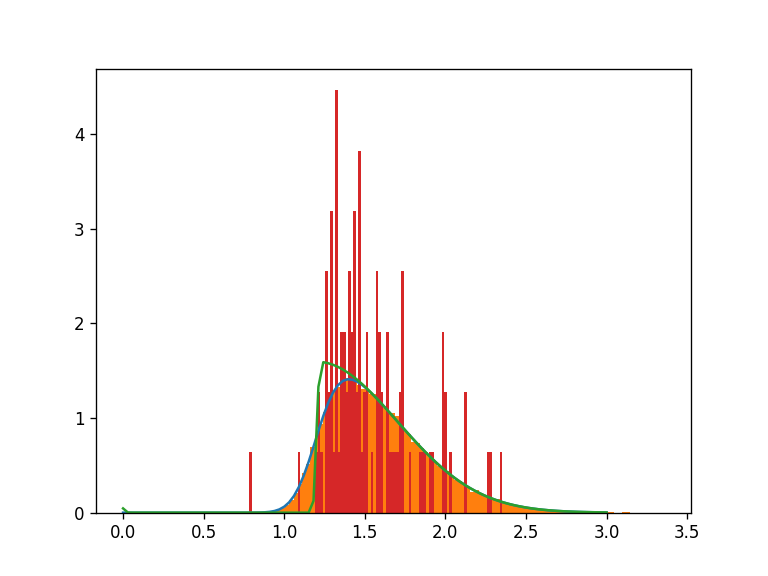

In [65]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

alpha = 4.3
mu = 1.2
sigma = 0.5

x1 = np.abs(np.random.normal(0., 1., (100000,)))
x2 = np.random.normal(0, 1., (100000,))

x3 = (alpha*x1 + x2)/np.sqrt(1+alpha**2)
x3 = x3*sigma + mu

phi = lambda x: 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
psi = lambda x: 1/2.*(1 + erf(x/np.sqrt(2)))
pdf = lambda x: 2/sigma*phi((x-mu)/sigma)*psi(alpha*(x-mu)/sigma)

plt.plot(np.linspace(0,3,100), pdf(np.linspace(0,3,100)))
plt.hist(x3, bins=100, density=True)
plt.show()

In [97]:
now = time.time()
N = 1_000_000
alpha = 10 * np.arange(1, N+1) / N
mu = 10 * np.arange(1, N+1) / N
sigma = 10 * np.arange(1, N+1) / N

x1 = np.abs(np.random.normal(0., 1., (N,)))
x2 = np.random.normal(0, 1., (N,))

x3 = (alpha*x1 + x2)/np.sqrt(1+alpha**2)
x3 = x3*sigma + mu
print(time.time() - now)

# phi = lambda x: 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
# psi = lambda x: 1/2.*(1 + erf(x/np.sqrt(2)))
# pdf = lambda x: 2/sigma*phi((x-mu)/sigma)*psi(alpha*(x-mu)/sigma)

# plt.plot(np.linspace(0,3,100), pdf(np.linspace(0,3,100)))
# plt.hist(x3, bins=100, density=True)
# plt.show()

0.21214699745178223


In [107]:
# def skew_samples(mu, sigma, alpha, shape=(1,)):
#     print(shape)
#     x1 = np.abs(np.random.normal(0., 1., shape))
#     x2 = np.random.normal(0, 1., shape)

#     x3 = (alpha*x1 + x2)/np.sqrt(1+alpha**2)
#     x3 = x3*sigma + mu
#     return x3
def skew_samples(mu, sigma, alpha, N=1):
    x1 = np.abs(np.random.normal(0., 1., (N,)))
    x2 = np.random.normal(0, 1., (N,))

    x3 = (alpha*x1 + x2)/np.sqrt(1+alpha**2)
    x3 = x3*sigma + mu
    return x3

In [116]:
now = time.time()
all_samples = []
num_samples = 1_000

for i in range(20):  # integrate over temperature scenarios
    # temp_scenario = # random sample from Koopman temperature forecast
    # plug temperature scenario into Koopman, get a 1 month demand forecast
    mu_hat, sigma_hat, alpha_hat = np.random.uniform(-1, 1, (744,)), np.random.uniform(0, 2, (744,)), np.random.uniform(-1, 1, (744,))
    m = np.repeat(mu_hat, num_samples)
    s = np.repeat(sigma_hat, num_samples)
    a = np.repeat(alpha_hat, num_samples)
    print(time.time() - now)
#     uniform(-1, 1, (744, 1)), np.random.uniform(0, 2, (744, 1)), np.random.uniform(-1, 1, (744, 1))
#     m = np.repeat(mu_hat, num_samples, axis=0)
#     s = np.repeat(sigma_hat, num_samples, axis=0)
#     a = np.repeat(alpha_hat, num_samples, axis=0)
#     samples = skewnorm.rvs(alpha_hat, loc=mu_hat, scale=sigma_hat)
#     samples = skew_samples(m, s, a, shape=a.shape)
    samples = skew_samples(m, s, a, N=a.size)
    all_samples.extend(samples)
all_samples.sort()  # sort in order to find quantiles
q = all_samples[len(all_samples) // 2]
print(q)
print(time.time() - now)

1.8348000049591064
2.041445255279541
2.3394455909729004
2.6014838218688965
2.8377819061279297
3.0567820072174072
3.232407569885254
3.3687782287597656
3.505770444869995
3.670771598815918
3.822770595550537
3.9417757987976074
4.086770057678223
4.257807970046997
4.611216306686401
4.92648458480835
5.16652250289917
5.386949300765991
5.561947345733643
5.842829942703247
0.0021725425276970523
29.13512110710144


In [114]:
s.shape

(7440000,)

In [118]:
np.array(744. * 100 * 1000)

array(74400000.)